<a href="https://colab.research.google.com/github/Shivansh1205/heart-disease-predictor-using-scikit-learn-and-xgboost/blob/main/heart_disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [6]:
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [8]:
features = [x for x in df.columns if x not in 'HeartDisease']

In [9]:
print(len(features))

20


In [10]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

In [11]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


In [12]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

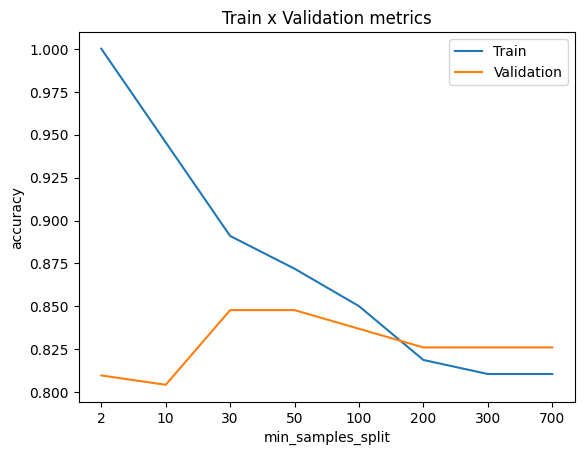

In [13]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

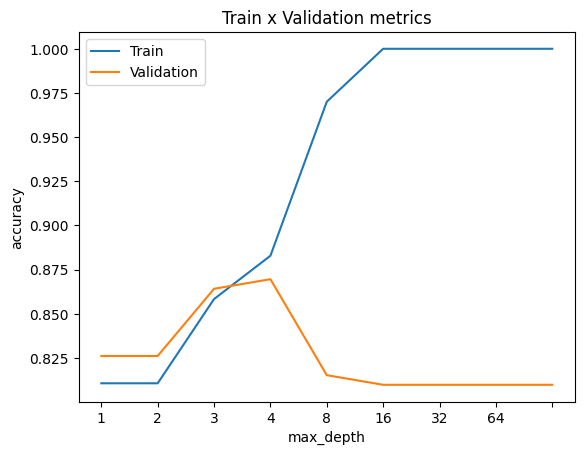

In [14]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [15]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [16]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics validation:
	Accuracy score: 0.8641


In [17]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

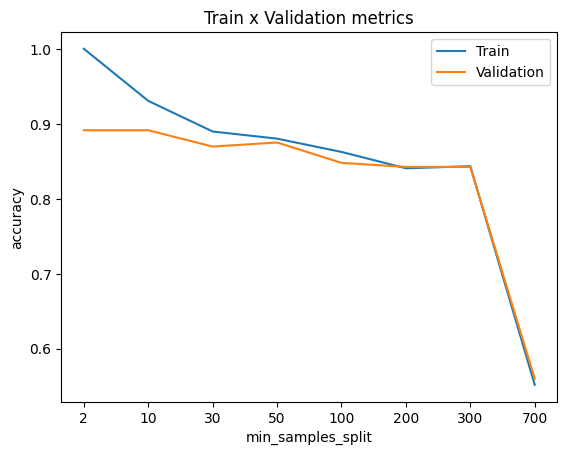

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

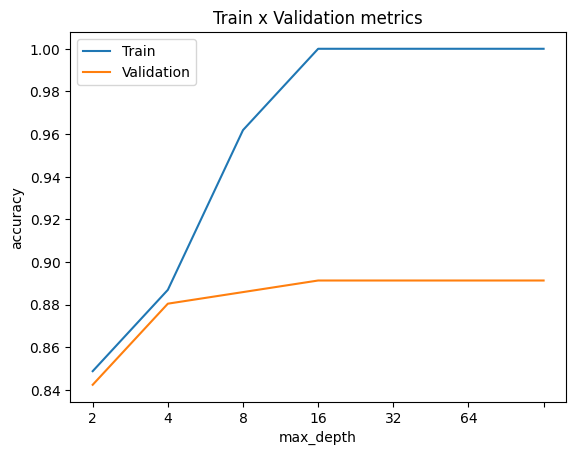

In [19]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

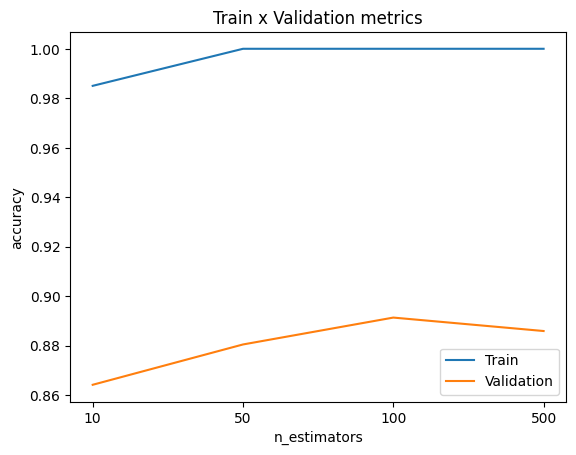

In [20]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [21]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16,
                                             min_samples_split = 10).fit(X_train,y_train)

In [22]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9305
Metrics test:
	Accuracy score: 0.8859


In [23]:
n = int(len(X_train)*0.8)

In [34]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [35]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [65]:
import xgboost as xgb
import numpy as np

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train_fit, label=y_train_fit)
dval   = xgb.DMatrix(X_train_eval, label=y_train_eval)

n_classes = len(np.unique(y_train_fit))

params = {
    "eta": 0.1,
    "max_depth": 6,
    "tree_method": "hist",
    "seed": RANDOM_STATE,
}

# Binary classification
if n_classes == 2:
    params["objective"] = "binary:logistic"
    params["eval_metric"] = "logloss"

# Multiclass classification
else:
    params["objective"] = "multi:softprob"
    params["eval_metric"] = "mlogloss"
    params["num_class"] = n_classes

# Early stopping callback
es = xgb.callback.EarlyStopping(
    rounds=10,
    save_best=True,
    maximize=False,
    data_name="validation",
    metric_name=params["eval_metric"]
)

# Train
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dval, "validation")],
    callbacks=[es],
)

print("Best iteration:", booster.best_iteration)
print("Best score:", booster.best_score)



[0]	validation-logloss:0.63301
[1]	validation-logloss:0.59553
[2]	validation-logloss:0.56612
[3]	validation-logloss:0.54186
[4]	validation-logloss:0.52348
[5]	validation-logloss:0.50610
[6]	validation-logloss:0.49371
[7]	validation-logloss:0.48365
[8]	validation-logloss:0.47321
[9]	validation-logloss:0.46537
[10]	validation-logloss:0.45999
[11]	validation-logloss:0.45620
[12]	validation-logloss:0.45482
[13]	validation-logloss:0.44974
[14]	validation-logloss:0.44494
[15]	validation-logloss:0.44072
[16]	validation-logloss:0.44078
[17]	validation-logloss:0.43935
[18]	validation-logloss:0.44206
[19]	validation-logloss:0.44536
[20]	validation-logloss:0.44321
[21]	validation-logloss:0.44310
[22]	validation-logloss:0.44419
[23]	validation-logloss:0.44797
[24]	validation-logloss:0.44843
[25]	validation-logloss:0.45337
[26]	validation-logloss:0.45206
[27]	validation-logloss:0.45435
Best iteration: 17
Best score: 0.43935144799096243


In [66]:
from sklearn.metrics import accuracy_score

# Predictions
train_preds_proba = booster.predict(dtrain)   # probabilities
val_preds_proba   = booster.predict(dval)

if n_classes == 2:
    # Binary classification: threshold at 0.5
    train_preds = (train_preds_proba > 0.5).astype(int)
    val_preds   = (val_preds_proba > 0.5).astype(int)
else:
    # Multiclass classification: take argmax
    train_preds = np.argmax(train_preds_proba, axis=1)
    val_preds   = np.argmax(val_preds_proba, axis=1)

# Accuracy
train_acc = accuracy_score(y_train_fit, train_preds)
val_acc   = accuracy_score(y_train_eval, val_preds)

print("Accuracy Scores:")
print(f"  Train: {train_acc:.4f}")
print(f"  Test : {val_acc:.4f}")


Accuracy Scores:
  Train: 0.9608
  Test : 0.8163
